# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.
### Цель лабораторной работы: изучение способов предварительной обработки данных для дальнейшего формирования моделей.
#### Задание:
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных.

Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:

обработку пропусков в данных;

кодирование категориальных признаков;

масштабирование данных.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# размер набора данных
data.shape

(407688, 102)

In [ ]:
# типы колонок
data.dtypes

In [ ]:
# проверим есть ли пропущенные значения
data.isnull().sum()

In [ ]:
# Первые 5 строк датасета
data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [ ]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 407688


## Обработка пропусков в данных
### Простые стратегии - удаление или заполнение нулями

In [ ]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((407688, 102), (407688, 41))

In [ ]:
data_new_1.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [ ]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((407688, 102), (0, 102))

In [ ]:
data_new_2.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


## "Внедрение значений"

In [ ]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка down. Тип данных float64. Количество пустых значений 61154, 15.0%.
Колонка TimeSecs. Тип данных float64. Количество пустых значений 224, 0.05%.
Колонка PlayTimeDiff. Тип данных float64. Количество пустых значений 444, 0.11%.
Колонка yrdln. Тип данных float64. Количество пустых значений 840, 0.21%.
Колонка yrdline100. Тип данных float64. Количество пустых значений 840, 0.21%.
Колонка GoalToGo. Тип данных float64. Количество пустых значений 840, 0.21%.
Колонка FirstDown. Тип данных float64. Количество пустых значений 28811, 7.07%.
Колонка FieldGoalDistance. Тип данных float64. Количество пустых значений 398740, 97.81%.
Колонка PosTeamScore. Тип данных float64. Количество пустых значений 26904, 6.6%.
Колонка DefTeamScore. Тип данных float64. Количество пустых значений 26904, 6.6%.
Колонка ScoreDiff. Тип данных float64. Количество пустых значений 24988, 6.13%.
Колонка AbsScoreDiff. Тип данных float64. Количество пустых значений 26904, 6.6%.
Колонка No_Score_Prob. Тип данных float64

In [ ]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,FieldGoalDistance,PosTeamScore,DefTeamScore,...,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
0,NaN,3600.0,0.0,30.0,30.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN
1,1.0,3593.0,7.0,42.0,58.0,0.0,0.0,NaN,0.0,0.0,...,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899
2,2.0,3556.0,37.0,47.0,53.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN
3,3.0,3515.0,41.0,44.0,56.0,0.0,0.0,NaN,0.0,0.0,...,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239
4,4.0,3507.0,8.0,44.0,56.0,0.0,1.0,NaN,0.0,0.0,...,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,NaN,28.0,4.0,32.0,32.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
407684,3.0,28.0,0.0,23.0,77.0,0.0,0.0,NaN,27.0,30.0,...,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136
407685,4.0,24.0,4.0,23.0,77.0,0.0,1.0,NaN,27.0,30.0,...,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006
407686,1.0,14.0,10.0,36.0,36.0,0.0,0.0,NaN,30.0,27.0,...,NaN,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN


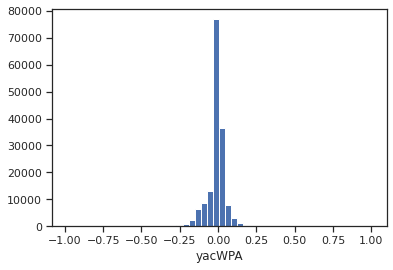

In [ ]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [ ]:
data_num_down = data_num[['down']]
data_num_down.head()

,down
0,NaN
1,1.0
2,2.0
3,3.0
4,4.0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [ ]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_down)
mask_missing_values_only

In [ ]:
strategies=['mean', 'median', 'most_frequent']

In [ ]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_down)
    return data_num_imp[mask_missing_values_only]

In [ ]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([2.00247595, 2.00247595, 2.00247595, ..., 2.00247595, 2.00247595,
        2.00247595]))

In [ ]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [ ]:
data[['WPA']].describe()

,WPA
count,402147.000000
mean,0.002099
std,0.045363
min,-0.997214
25%,-0.014728
50%,0.000000
75%,0.014684
max,0.994848


In [ ]:
test_num_impute_col(data, 'WPA', strategies[0])

('WPA', 'mean', 5541, 0.0020990753992248938, 0.0020990753992248938)

## Обработка пропусков в категориальных данных

In [ ]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка time. Тип данных object. Количество пустых значений 224, 0.05%.
Колонка SideofField. Тип данных object. Количество пустых значений 528, 0.13%.
Колонка posteam. Тип данных object. Количество пустых значений 24992, 6.13%.
Колонка DefensiveTeam. Тип данных object. Количество пустых значений 24992, 6.13%.
Колонка desc. Тип данных object. Количество пустых значений 2, 0.0%.
Колонка ExPointResult. Тип данных object. Количество пустых значений 397578, 97.52%.
Колонка TwoPointConv. Тип данных object. Количество пустых значений 407083, 99.85%.
Колонка DefTwoPoint. Тип данных object. Количество пустых значений 407664, 99.99%.
Колонка PuntResult. Тип данных object. Количество пустых значений 385317, 94.51%.
Колонка Passer. Тип данных object. Количество пустых значений 240045, 58.88%.
Колонка PassOutcome. Тип данных object. Количество пустых значений 239506, 58.75%.
Колонка PassLength. Тип данных object. Количество пустых значений 240520, 59.0%.
Колонка PassLocation. Тип данных object. Кол

In [ ]:
cat_temp_data = data[['SideofField']]
cat_temp_data.head()

,SideofField
0,TEN
1,PIT
2,PIT
3,PIT
4,PIT


In [ ]:
cat_temp_data['SideofField'].unique()

In [ ]:
cat_temp_data[cat_temp_data['SideofField'].isnull()].shape

(528, 1)

In [ ]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

In [ ]:
# Пустые значения отсутствуют
np.unique(data_imp2)

In [ ]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

In [ ]:
np.unique(data_imp3)

In [ ]:
data_imp3[data_imp3=='NA'].size

528

## Преобразование категориальных признаков в числовые

In [ ]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,TEN
1,PIT
2,PIT
3,PIT
4,PIT
...,...
407683,BAL
407684,BAL
407685,BAL
407686,BAL


## Кодирование категорий целочисленными значениями 
#### Использование LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_enc['c1'].unique()

In [ ]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [ ]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

In [ ]:
cat_enc_le

In [ ]:
np.unique(cat_enc_le)

## Кодирование категорий наборами бинарных значений

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [ ]:
cat_enc.shape

(407688, 1)

In [ ]:
cat_enc_ohe.shape

(407688, 37)

In [ ]:
cat_enc_ohe.todense()[0:10]

In [ ]:
cat_enc.head(10)

,c1
0,TEN
1,PIT
2,PIT
3,PIT
4,PIT
5,TEN
6,TEN
7,TEN
8,TEN
9,TEN


In [ ]:
pd.get_dummies(cat_enc).head()

,c1_50,c1_ARI,c1_ATL,c1_BAL,c1_BUF,c1_CAR,c1_CHI,c1_CIN,c1_CLE,c1_DAL,...,c1_OAK,c1_PHI,c1_PIT,c1_SD,c1_SEA,c1_SF,c1_STL,c1_TB,c1_TEN,c1_WAS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,SideofField_50,SideofField_ARI,SideofField_ATL,SideofField_BAL,SideofField_BUF,SideofField_CAR,SideofField_CHI,SideofField_CIN,SideofField_CLE,SideofField_DAL,...,SideofField_PHI,SideofField_PIT,SideofField_SD,SideofField_SEA,SideofField_SF,SideofField_STL,SideofField_TB,SideofField_TEN,SideofField_WAS,SideofField_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Масштабирование данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['PlayAttempted']])

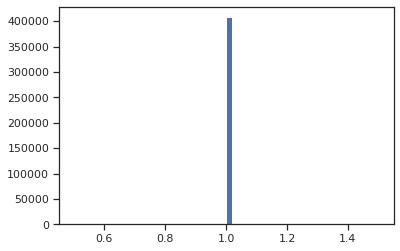

In [ ]:
plt.hist(data['PlayAttempted'], 50)
plt.show()

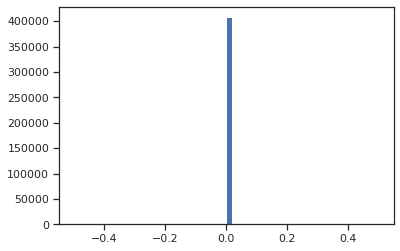

In [ ]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки - StandardScaler

In [ ]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['PlayAttempted']])

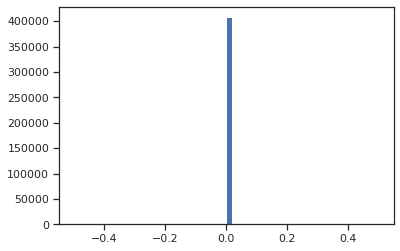

In [ ]:
plt.hist(sc2_data, 50)
plt.show()